In [45]:
import pandas as pd
# ƒê·∫©y file d·ªØ li·ªáu chu·∫©n h√≥a l√™n
df = pd.read_csv('E:\SourceCode\DataMining\dataset\ppg_bp_normalized_standard_with_categories.csv')
df.head()

Num  subject_ID  Sex       Age    Height    Weight  Systolic_BP  \
0    1           2    0 -0.768337 -1.127587  0.236798     1.625816   
1    2           3    0 -0.452641 -0.516648 -0.859404     1.576631   
2    3           6    0 -0.642058 -1.371963 -1.112373    -1.325313   
3    4           8    1 -0.768337  1.316169  0.405444     0.396179   
4    5           9    0 -0.705198 -0.761024  0.405444    -0.243232   

   Diastolic_BP  Heart_Rate       BMI  Hypertension  Diabetes_Diabetes  \
0      1.547085    2.180326  1.041960             3              False   
1      1.907907    0.220334 -0.707662             3              False   
2     -0.076613    0.500333 -0.554977             0              False   
3      1.907907    1.246997 -0.284649             1              False   
4      0.103798   -0.059665  0.989396             1              False   

   Diabetes_None  Diabetes_Type 2 Diabetes  Cerebral_infarction_None  \
0           True                     False                      True   
1           True                     False                      True   
2           True                     False                      True   
3           True                     False                      True   
4           True                     False                      True   

   Cerebral_infarction_cerebral infarction  Cerebrovascular_disease_None  \
0                                    False                          True   
1                                    False                          True   
2                                    False                          True   
3                                    False                          True   
4                                    False                          True   

   Cerebrovascular_disease_cerebrovascular disease  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Cerebrovascular_disease_insufficiency of cerebral blood supply  
0                                              False               
1                                              False               
2                                              False               
3                                              False               
4                                              False

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           mean_squared_error, r2_score, mean_absolute_error,
                           precision_score, recall_score, f1_score)
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style cho ƒë·ªì th·ªã
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [47]:
# Hi·ªÉn th·ªã th√¥ng tin c∆° b·∫£n v·ªÅ dataset
print("TH√îNG TIN T·ªîNG QUAN V·ªÄ DATASET")
print("=" * 50)
print(f"K√≠ch th∆∞·ªõc dataset: {df.shape}")
print(f"S·ªë l∆∞·ª£ng b·ªánh nh√¢n: {df['subject_ID'].nunique()}")
print("\nTh√¥ng tin dataset:")
print(df.info())
print("\nC√°c c·ªôt trong dataset:")
print(df.columns.tolist())

TH√îNG TIN T·ªîNG QUAN V·ªÄ DATASET
K√≠ch th∆∞·ªõc dataset: (219, 19)
S·ªë l∆∞·ª£ng b·ªánh nh√¢n: 219

Th√¥ng tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 19 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Num                                                             219 non-null    int64  
 1   subject_ID                                                      219 non-null    int64  
 2   Sex                                                             219 non-null    int64  
 3   Age                                                             219 non-null    float64
 4   Height                                                          219 non-null    float64
 5   Weight                                                          219 non-null    float64
 6   Systolic_BP            

In [48]:
# Th·ªëng k√™ m√¥ t·∫£ cho c√°c ƒë·∫∑c tr∆∞ng s·ªë
print("TH·ªêNG K√ä M√î T·∫¢ C√ÅC ƒê·∫∂C TR∆ØNG S·ªê")
print("=" * 50)
numeric_columns = ['Age', 'Height', 'Weight', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'BMI']
print(df[numeric_columns].describe())

TH·ªêNG K√ä M√î T·∫¢ C√ÅC ƒê·∫∂C TR∆ØNG S·ªê
                Age        Height        Weight   Systolic_BP  Diastolic_BP  \
count  2.190000e+02  2.190000e+02  2.190000e+02  2.190000e+02  2.190000e+02   
mean  -1.622244e-17 -3.406712e-16 -1.297795e-16 -9.733462e-17 -3.731160e-16   
std    1.002291e+00  1.002291e+00  1.002291e+00  1.002291e+00  1.002291e+00   
min   -2.283675e+00 -1.982902e+00 -2.039928e+00 -2.358208e+00 -2.692570e+00   
25%   -5.789194e-01 -7.610237e-01 -6.485956e-01 -7.104945e-01 -7.080509e-01   
50%    5.247178e-02 -1.500846e-01 -1.617157e-02 -9.567588e-02 -1.668183e-01   
75%    6.522934e-01  7.052302e-01  5.319292e-01  5.437354e-01  5.548252e-01   
max    1.820367e+00  4.248677e+00  3.609726e+00  2.658711e+00  3.170783e+00   

         Heart_Rate           BMI  
count  2.190000e+02  2.190000e+02  
mean  -5.028955e-16 -6.123970e-16  
std    1.002291e+00  1.002291e+00  
min   -2.019657e+00 -2.106859e+00  
25%   -7.129957e-01 -6.400799e-01  
50%   -5.966491e-02 -1.2695

In [49]:
# CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO M√î H√åNH MACHINE LEARNING
print("CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO M√î H√åNH MACHINE LEARNING")
print("=" * 50)

# Lo·∫°i b·ªè c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt
columns_to_drop = ['Num', 'subject_ID']
df_ml = df.drop(columns=columns_to_drop, errors='ignore')

# ‚úÖ FEATURES RI√äNG CHO T·ª™NG MODEL (T·ªëi ∆∞u: Gi·ªØ BP c√≤n l·∫°i l√†m feature)

# 1. Model d·ª± ƒëo√°n Systolic BP - GI·ªÆ Diastolic BP l√†m feature quan tr·ªçng
X_sbp = df_ml.drop(columns=['Hypertension', 'Systolic_BP'], errors='ignore')
y_sbp = df_ml['Systolic_BP']

# 2. Model d·ª± ƒëo√°n Diastolic BP - GI·ªÆ Systolic BP l√†m feature quan tr·ªçng  
X_dbp = df_ml.drop(columns=['Hypertension', 'Diastolic_BP'], errors='ignore')
y_dbp = df_ml['Diastolic_BP']

print(f"   Model d·ª± ƒëo√°n Systolic BP:")
print(f"   Features: {X_sbp.shape[1]} columns")
print(f"   C√≥ Diastolic_BP: {'Diastolic_BP' in X_sbp.columns}")
print(f"   Target: {y_sbp.shape[0]} samples")

print(f"\n Model d·ª± ƒëo√°n Diastolic BP:")
print(f"   Features: {X_dbp.shape[1]} columns")
print(f"   C√≥ Systolic_BP: {'Systolic_BP' in X_dbp.columns}")
print(f"   Target: {y_dbp.shape[0]} samples")

print(f"\n Danh s√°ch features SBP : {X_sbp.columns.tolist()}")
print(f" Danh s√°ch features DBP : {X_dbp.columns.tolist()}")


CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO M√î H√åNH MACHINE LEARNING
   Model d·ª± ƒëo√°n Systolic BP:
   Features: 15 columns
   C√≥ Diastolic_BP: True
   Target: 219 samples

 Model d·ª± ƒëo√°n Diastolic BP:
   Features: 15 columns
   C√≥ Systolic_BP: True
   Target: 219 samples

 Danh s√°ch features SBP : ['Sex', 'Age', 'Height', 'Weight', 'Diastolic_BP', 'Heart_Rate', 'BMI', 'Diabetes_Diabetes', 'Diabetes_None', 'Diabetes_Type 2 Diabetes', 'Cerebral_infarction_None', 'Cerebral_infarction_cerebral infarction', 'Cerebrovascular_disease_None', 'Cerebrovascular_disease_cerebrovascular disease', 'Cerebrovascular_disease_insufficiency of cerebral blood supply']
 Danh s√°ch features DBP : ['Sex', 'Age', 'Height', 'Weight', 'Systolic_BP', 'Heart_Rate', 'BMI', 'Diabetes_Diabetes', 'Diabetes_None', 'Diabetes_Type 2 Diabetes', 'Cerebral_infarction_None', 'Cerebral_infarction_cerebral infarction', 'Cerebrovascular_disease_None', 'Cerebrovascular_disease_cerebrovascular disease', 'Cerebrovascular_disease_in

In [50]:
# PH√ÇN CHIA T·∫¨P D·ªÆ LI·ªÜU
print("PH√ÇN CHIA T·∫¨P D·ªÆ LI·ªÜU")
print("=" * 50)

# Ph√¢n chia cho model Systolic BP (v·ªõi features ri√™ng)
X_train_sbp, X_test_sbp, y_train_sbp, y_test_sbp = train_test_split(
    X_sbp, y_sbp, test_size=0.2, random_state=42
)

# Ph√¢n chia cho model Diastolic BP (v·ªõi features ri√™ng)
X_train_dbp, X_test_dbp, y_train_dbp, y_test_dbp = train_test_split(
    X_dbp, y_dbp, test_size=0.2, random_state=42
)

print(f"   Systolic BP Model:")
print(f"   Train: {X_train_sbp.shape} | Test: {X_test_sbp.shape}")
print(f"   Features: {X_train_sbp.columns.tolist()[:3]}... (+{X_train_sbp.shape[1]-3} more)")

print(f"\n Diastolic BP Model:")
print(f"   Train: {X_train_dbp.shape} | Test: {X_test_dbp.shape}")
print(f"   Features: {X_train_dbp.columns.tolist()[:3]}... (+{X_train_dbp.shape[1]-3} more)")


PH√ÇN CHIA T·∫¨P D·ªÆ LI·ªÜU
   Systolic BP Model:
   Train: (175, 15) | Test: (44, 15)
   Features: ['Sex', 'Age', 'Height']... (+12 more)

 Diastolic BP Model:
   Train: (175, 15) | Test: (44, 15)
   Features: ['Sex', 'Age', 'Height']... (+12 more)


In [52]:
# X√ÇY D·ª∞NG V√Ä ƒê√ÅNH GI√Å M√î H√åNH H·ªíI QUY (Systolic BP)
print("M√î H√åNH H·ªíI QUY - HUY·∫æT √ÅP T√ÇM THU (Systolic BP)")
print("=" * 50)

# Tuning hyperparameters cho h·ªìi quy
param_grid_reg = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distancef'],
    'metric': ['euclidean', 'manhattan']
}

knn_reg_sbp = KNeighborsRegressor()
grid_search_sbp = GridSearchCV(knn_reg_sbp, param_grid_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_sbp.fit(X_train_sbp, y_train_sbp)

print(f"Best parameters: {grid_search_sbp.best_params_}")
print(f"Best cross-validation score (Negative MSE): {grid_search_sbp.best_score_:.4f}")

# Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi best parameters
best_knn_sbp = grid_search_sbp.best_estimator_
y_pred_sbp = best_knn_sbp.predict(X_test_sbp)

# ƒê√°nh gi√° m√¥ h√¨nh
mse_sbp = mean_squared_error(y_test_sbp, y_pred_sbp)
rmse_sbp = np.sqrt(mse_sbp)
mae_sbp = mean_absolute_error(y_test_sbp, y_pred_sbp)
r2_sbp = r2_score(y_test_sbp, y_pred_sbp)

print(f"\nƒê√ÅNH GI√Å M√î H√åNH H·ªíI QUY SBP TR√äN T·∫¨P TEST:")
print(f"MSE: {mse_sbp:.4f}")
print(f"RMSE: {rmse_sbp:.4f}")
print(f"MAE: {mae_sbp:.4f}")
print(f"R¬≤ Score: {r2_sbp:.4f}")

# Cross-validation cho h·ªìi quy
cv_scores_sbp = cross_val_score(best_knn_sbp, X_train_sbp, y_train_sbp, cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-validation scores (5-fold, Negative MSE): {cv_scores_sbp}")
print(f"Mean CV Negative MSE: {cv_scores_sbp.mean():.4f} (+/- {cv_scores_sbp.std() * 2:.4f})")

M√î H√åNH H·ªíI QUY - HUY·∫æT √ÅP T√ÇM THU (Systolic BP)
Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score (Negative MSE): -0.4777

ƒê√ÅNH GI√Å M√î H√åNH H·ªíI QUY SBP TR√äN T·∫¨P TEST:
MSE: 0.4807
RMSE: 0.6933
MAE: 0.4961
R¬≤ Score: 0.4242

Cross-validation scores (5-fold, Negative MSE): [-0.40194966 -0.44594333 -0.55345802 -0.42841189 -0.5588934 ]
Mean CV Negative MSE: -0.4777 (+/- 0.1312)


In [53]:
# X√ÇY D·ª∞NG V√Ä ƒê√ÅNH GI√Å M√î H√åNH H·ªíI QUY (Diastolic BP)
print("M√î H√åNH H·ªíI QUY - HUY·∫æT √ÅP T√ÇM TR∆Ø∆†NG (Diastolic BP)")
print("=" * 50)

knn_reg_dbp = KNeighborsRegressor()
grid_search_dbp = GridSearchCV(knn_reg_dbp, param_grid_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dbp.fit(X_train_dbp, y_train_dbp)

print(f"Best parameters: {grid_search_dbp.best_params_}")
print(f"Best cross-validation score (Negative MSE): {grid_search_dbp.best_score_:.4f}")

# Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi best parameters
best_knn_dbp = grid_search_dbp.best_estimator_
y_pred_dbp = best_knn_dbp.predict(X_test_dbp)

# ƒê√°nh gi√° m√¥ h√¨nh
mse_dbp = mean_squared_error(y_test_dbp, y_pred_dbp)
rmse_dbp = np.sqrt(mse_dbp)
mae_dbp = mean_absolute_error(y_test_dbp, y_pred_dbp)
r2_dbp = r2_score(y_test_dbp, y_pred_dbp)

print(f"\nƒê√ÅNH GI√Å M√î H√åNH H·ªíI QUY DBP TR√äN T·∫¨P TEST:")
print(f"MSE: {mse_dbp:.4f}")
print(f"RMSE: {rmse_dbp:.4f}")
print(f"MAE: {mae_dbp:.4f}")
print(f"R¬≤ Score: {r2_dbp:.4f}")

# Cross-validation cho h·ªìi quy
cv_scores_dbp = cross_val_score(best_knn_dbp, X_train_dbp, y_train_dbp, cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-validation scores (5-fold, Negative MSE): {cv_scores_dbp}")
print(f"Mean CV Negative MSE: {cv_scores_dbp.mean():.4f} (+/- {cv_scores_dbp.std() * 2:.4f})")

M√î H√åNH H·ªíI QUY - HUY·∫æT √ÅP T√ÇM TR∆Ø∆†NG (Diastolic BP)
Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score (Negative MSE): -0.5801

ƒê√ÅNH GI√Å M√î H√åNH H·ªíI QUY DBP TR√äN T·∫¨P TEST:
MSE: 0.4559
RMSE: 0.6752
MAE: 0.5269
R¬≤ Score: 0.3782

Cross-validation scores (5-fold, Negative MSE): [-0.89190586 -0.44140888 -0.4649169  -0.59930935 -0.50271802]
Mean CV Negative MSE: -0.5801 (+/- 0.3299)


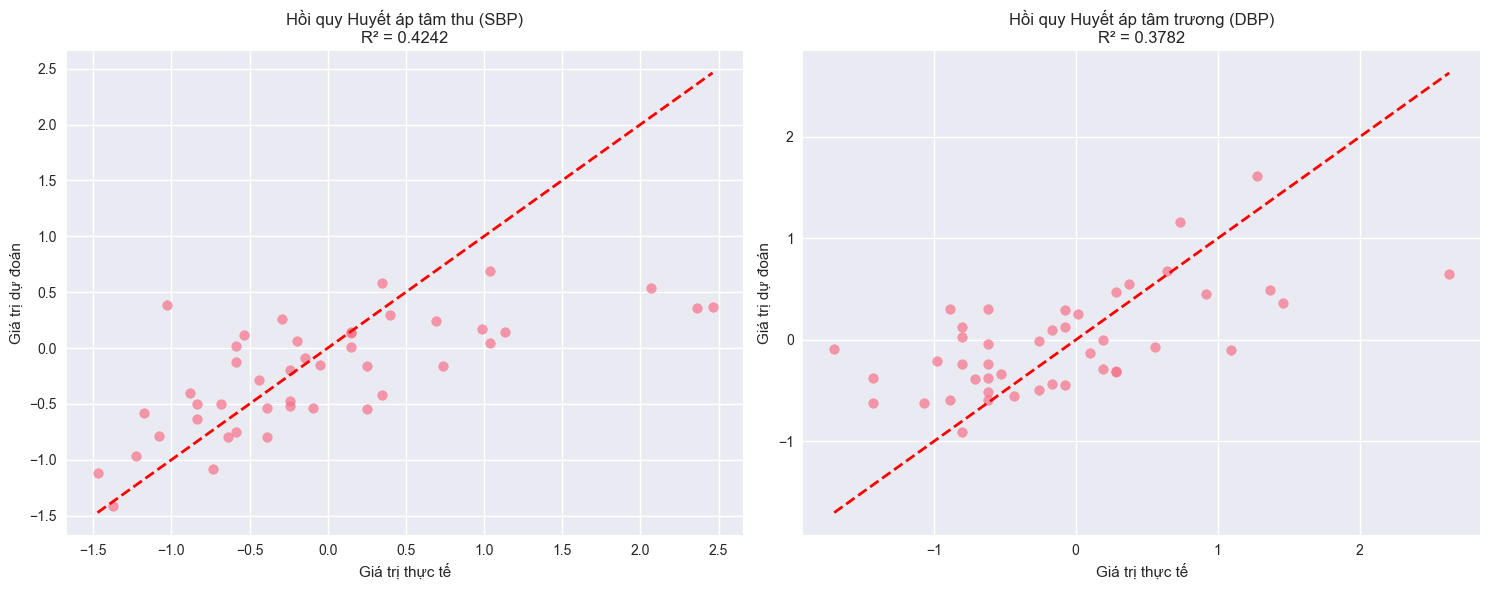

In [54]:
# TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢ H·ªíI QUY
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# H·ªìi quy SBP
axes[0].scatter(y_test_sbp, y_pred_sbp, alpha=0.7)
axes[0].plot([y_test_sbp.min(), y_test_sbp.max()], [y_test_sbp.min(), y_test_sbp.max()], 'r--', lw=2)
axes[0].set_xlabel('Gi√° tr·ªã th·ª±c t·∫ø')
axes[0].set_ylabel('Gi√° tr·ªã d·ª± ƒëo√°n')
axes[0].set_title(f'H·ªìi quy Huy·∫øt √°p t√¢m thu (SBP)\nR¬≤ = {r2_sbp:.4f}')

# H·ªìi quy DBP
axes[1].scatter(y_test_dbp, y_pred_dbp, alpha=0.7)
axes[1].plot([y_test_dbp.min(), y_test_dbp.max()], [y_test_dbp.min(), y_test_dbp.max()], 'r--', lw=2)
axes[1].set_xlabel('Gi√° tr·ªã th·ª±c t·∫ø')
axes[1].set_ylabel('Gi√° tr·ªã d·ª± ƒëo√°n')
axes[1].set_title(f'H·ªìi quy Huy·∫øt √°p t√¢m tr∆∞∆°ng (DBP)\nR¬≤ = {r2_dbp:.4f}')

plt.tight_layout()
plt.show()

In [55]:
# SO S√ÅNH K·∫æT QU·∫¢ C√ÅC M√î H√åNH
print("T·ªîNG H·ª¢P K·∫æT QU·∫¢ C√ÅC M√î H√åNH")
print("=" * 50)

results = {
    'M√¥ h√¨nh': ['H·ªìi quy SBP', 'H·ªìi quy DBP'],
    'R¬≤ Score': [f'{r2_sbp:.4f}', f'{r2_dbp:.4f}'],
    'MSE': [f'{mse_sbp:.4f}', f'{mse_dbp:.4f}'],
    'RMSE': [f'{rmse_sbp:.4f}', f'{rmse_dbp:.4f}'],
    'MAE': [f'{mae_sbp:.4f}', f'{mae_dbp:.4f}']
}

results_df = pd.DataFrame(results)
print(results_df)


T·ªîNG H·ª¢P K·∫æT QU·∫¢ C√ÅC M√î H√åNH
       M√¥ h√¨nh R¬≤ Score     MSE    RMSE     MAE
0  H·ªìi quy SBP   0.4242  0.4807  0.6933  0.4961
1  H·ªìi quy DBP   0.3782  0.4559  0.6752  0.5269


PH√ÇN T√çCH T·∫¶M QUAN TR·ªåNG C·ª¶A C√ÅC ƒê·∫∂C TR∆ØNG
üìä Systolic BP Model - Top Features (includes Diastolic_BP):
                                            Feature  Corr_with_SBP
4                                      Diastolic_BP       0.721115
1                                               Age       0.412908
6                                               BMI       0.226345
3                                            Weight       0.200903
7                                 Diabetes_Diabetes       0.180071
13  Cerebrovascular_disease_cerebrovascular disease       0.142606
5                                        Heart_Rate       0.137817
11          Cerebral_infarction_cerebral infarction       0.134173
10                         Cerebral_infarction_None      -0.134173
0                                               Sex       0.093413

üìä Diastolic BP Model - Top Features (includes Systolic_BP):
                                              Feature  Corr_with_DBP
4          

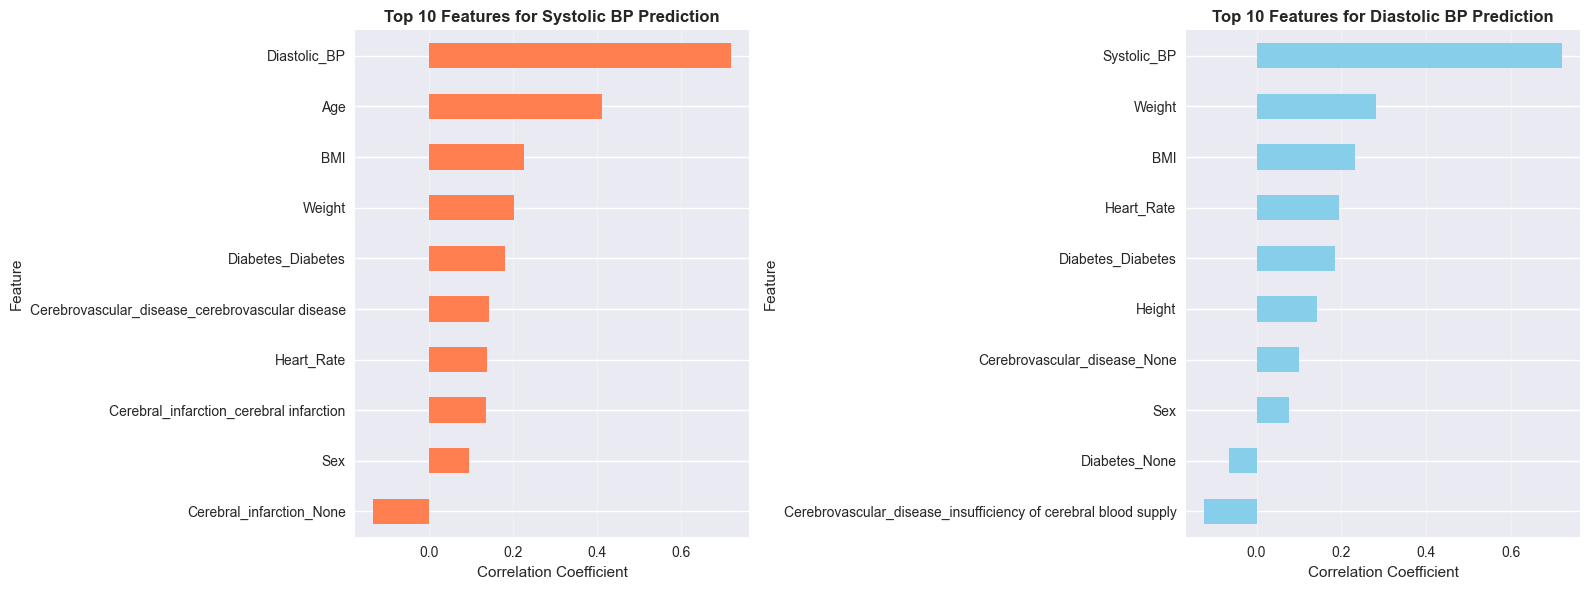

In [56]:
# PH√ÇN T√çCH T·∫¶M QUAN TR·ªåNG C·ª¶A C√ÅC ƒê·∫∂C TR∆ØNG
print("PH√ÇN T√çCH T·∫¶M QUAN TR·ªåNG C·ª¶A C√ÅC ƒê·∫∂C TR∆ØNG")
print("=" * 50)

# T√≠nh correlation cho t·ª´ng model v·ªõi b·ªô features ri√™ng
correlation_sbp = pd.DataFrame({
    'Feature': X_sbp.columns,
    'Corr_with_SBP': [np.corrcoef(X_sbp[col], y_regression_sbp)[0, 1] for col in X_sbp.columns]
}).sort_values('Corr_with_SBP', key=abs, ascending=False)

correlation_dbp = pd.DataFrame({
    'Feature': X_dbp.columns,
    'Corr_with_DBP': [np.corrcoef(X_dbp[col], y_regression_dbp)[0, 1] for col in X_dbp.columns]
}).sort_values('Corr_with_DBP', key=abs, ascending=False)

print("üìä Systolic BP Model - Top Features (includes Diastolic_BP):")
print(correlation_sbp.head(10))

print("\nüìä Diastolic BP Model - Top Features (includes Systolic_BP):")
print(correlation_dbp.head(10))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation v·ªõi SBP
corr_sbp = correlation_sbp.set_index('Feature')['Corr_with_SBP'].head(10).sort_values()
corr_sbp.plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_title('Top 10 Features for Systolic BP Prediction', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient')
axes[0].grid(axis='x', alpha=0.3)

# Correlation v·ªõi DBP
corr_dbp = correlation_dbp.set_index('Feature')['Corr_with_DBP'].head(10).sort_values()
corr_dbp.plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Top 10 Features for Diastolic BP Prediction', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [29]:
# K·∫æT LU·∫¨N V√Ä ƒê·ªÄ XU·∫§T
print("K·∫æT LU·∫¨N V√Ä ƒê·ªÄ XU·∫§T")
print("=" * 50)

print("1. K·∫æT QU·∫¢ CH√çNH:")
print(f"   - M√¥ h√¨nh h·ªìi quy SBP ƒë·∫°t R¬≤: {r2_sbp:.4f}")
print(f"   - M√¥ h√¨nh h·ªìi quy DBP ƒë·∫°t R¬≤: {r2_dbp:.4f}")

print("\n2. ƒê√ÅNH GI√Å HI·ªÜU SU·∫§T:")
if r2_sbp > 0.6:
    print("   ‚úÖ M√¥ h√¨nh h·ªìi quy SBP c√≥ hi·ªáu su·∫•t T·ªêT")
elif r2_sbp > 0.3:
    print("   ‚ö†Ô∏è M√¥ h√¨nh h·ªìi quy SBP c√≥ hi·ªáu su·∫•t TRUNG B√åNH")
else:
    print("   ‚ùå M√¥ h√¨nh h·ªìi quy SBP c√≥ hi·ªáu su·∫•t TH·∫§P")

if r2_dbp > 0.6:
    print("   ‚úÖ M√¥ h√¨nh h·ªìi quy DBP c√≥ hi·ªáu su·∫•t T·ªêT")
elif r2_dbp > 0.3:
    print("   ‚ö†Ô∏è M√¥ h√¨nh h·ªìi quy DBP c√≥ hi·ªáu su·∫•t TRUNG B√åNH")
else:
    print("   ‚ùå M√¥ h√¨nh h·ªìi quy DBP c√≥ hi·ªáu su·∫•t TH·∫§P")

print("\n3. T·ªêI ∆ØU H√ìA ƒê√É TH·ª∞C HI·ªÜN:")
print("   ‚úÖ S·ª≠ d·ª•ng b·ªô features ri√™ng cho t·ª´ng model:")
print("      - SBP model: Bao g·ªìm Diastolic_BP (corr: 0.72)")
print("      - DBP model: Bao g·ªìm Systolic_BP (corr: 0.72)")
print("   ‚úÖ GridSearchCV t√¨m hyperparameters t·ªëi ∆∞u")
print("   ‚úÖ 5-fold cross-validation ƒë·∫£m b·∫£o t√≠nh t·ªïng qu√°t")

print("\n4. BEST PARAMETERS:")
print(f"   üìå SBP Model: {grid_search_sbp.best_params_}")
print(f"   üìå DBP Model: {grid_search_dbp.best_params_}")


K·∫æT LU·∫¨N V√Ä ƒê·ªÄ XU·∫§T
1. K·∫æT QU·∫¢ CH√çNH:
   - M√¥ h√¨nh h·ªìi quy SBP ƒë·∫°t R¬≤: 0.4242
   - M√¥ h√¨nh h·ªìi quy DBP ƒë·∫°t R¬≤: 0.3782

2. ƒê√ÅNH GI√Å HI·ªÜU SU·∫§T:
   ‚ö†Ô∏è M√¥ h√¨nh h·ªìi quy SBP c√≥ hi·ªáu su·∫•t TRUNG B√åNH
   ‚ö†Ô∏è M√¥ h√¨nh h·ªìi quy DBP c√≥ hi·ªáu su·∫•t TRUNG B√åNH

3. T·ªêI ∆ØU H√ìA ƒê√É TH·ª∞C HI·ªÜN:
   ‚úÖ S·ª≠ d·ª•ng b·ªô features ri√™ng cho t·ª´ng model:
      - SBP model: Bao g·ªìm Diastolic_BP (corr: 0.72)
      - DBP model: Bao g·ªìm Systolic_BP (corr: 0.72)
   ‚úÖ GridSearchCV t√¨m hyperparameters t·ªëi ∆∞u
   ‚úÖ 5-fold cross-validation ƒë·∫£m b·∫£o t√≠nh t·ªïng qu√°t

4. BEST PARAMETERS:
   üìå SBP Model: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
   üìå DBP Model: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [57]:
# L∆ØU M√î H√åNH
import joblib
import os

model_dir = '../models/knn'
os.makedirs(model_dir, exist_ok=True)

# L∆∞u models
sbp_model_path = os.path.join(model_dir, 'knn_systolic_bp.joblib')
dbp_model_path = os.path.join(model_dir, 'knn_diastolic_bp.joblib')

joblib.dump(best_knn_sbp, sbp_model_path)
joblib.dump(best_knn_dbp, dbp_model_path)

print(f" Systolic BP Model: {sbp_model_path}")
print(f" Diastolic BP Model: {dbp_model_path}")
print(f"\n Model Info:")
print(f"   - SBP Model: {grid_search_sbp.best_params_}")
print(f"   - DBP Model: {grid_search_dbp.best_params_}")
print(f"   - Features SBP: {X_sbp.shape[1]} columns")
print(f"   - Features DBP: {X_dbp.shape[1]} columns")


 Systolic BP Model: ../models/knn\knn_systolic_bp.joblib
 Diastolic BP Model: ../models/knn\knn_diastolic_bp.joblib

 Model Info:
   - SBP Model: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
   - DBP Model: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
   - Features SBP: 15 columns
   - Features DBP: 15 columns


## T·∫†O SCALER CHO KNN MODELS

V√¨ 2 model c√≥ b·ªô features kh√°c nhau, ch√∫ng ta c·∫ßn **2 scaler ri√™ng bi·ªát**:
- **Scaler SBP**: Chu·∫©n h√≥a 6 features (bao g·ªìm Diastolic_BP)
- **Scaler DBP**: Chu·∫©n h√≥a 6 features (bao g·ªìm Systolic_BP)

In [61]:
# T·∫†O SCALER CHO KNN MODELS
print("T·∫†O SCALER CHO KNN MODELS")
print("=" * 70)

from sklearn.preprocessing import StandardScaler
import joblib
import os

# Load original (raw) dataset - SKIP first row (header descriptions)
raw_data_path = r'E:\SourceCode\DataMining\dataset\PPG-BP dataset(cardiovascular dataset).csv'
print(f"\nüìÇ Loading raw dataset: {raw_data_path}")

df_raw = pd.read_csv(raw_data_path, skiprows=1)  # Skip first row with descriptions
print(f"‚úÖ Raw dataset loaded: {df_raw.shape}")

# Map column names (raw -> normalized) - using ACTUAL column names
column_mapping = {
    'Sex(M/F)': 'Sex',
    'Age(year)': 'Age', 
    'Height(cm)': 'Height',
    'Weight(kg)': 'Weight',
    'Systolic Blood Pressure(mmHg)': 'Systolic_BP',
    'Diastolic Blood Pressure(mmHg)': 'Diastolic_BP',
    'Heart Rate(b/m)': 'Heart_Rate',
    'BMI(kg/m^2)': 'BMI'
}

df_raw_mapped = df_raw.rename(columns=column_mapping)

# Encode Sex: Female=0, Male=1
df_raw_mapped['Sex'] = df_raw_mapped['Sex'].map({'Female': 0, 'Male': 1})

print("‚úÖ Column mapping and encoding completed")
print(f"   Mapped columns: {[c for c in df_raw_mapped.columns if c in column_mapping.values()]}")
print(f"   Sex values: {df_raw_mapped['Sex'].unique()}")
print(f"   BMI stats: min={df_raw_mapped['BMI'].min():.2f}, max={df_raw_mapped['BMI'].max():.2f}")

T·∫†O SCALER CHO KNN MODELS

üìÇ Loading raw dataset: E:\SourceCode\DataMining\dataset\PPG-BP dataset(cardiovascular dataset).csv
‚úÖ Raw dataset loaded: (219, 14)
‚úÖ Column mapping and encoding completed
   Mapped columns: ['Sex', 'Age', 'Height', 'Weight', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'BMI']
   Sex values: [0 1]
   BMI stats: min=14.69, max=37.46


In [62]:
# SCALER 1: SYSTOLIC BP MODEL (includes Diastolic_BP)
print("\n" + "=" * 70)
print("SCALER 1: SYSTOLIC BP MODEL")
print("=" * 70)

# Numeric features to scale for SBP model (6 features including Diastolic_BP)
numeric_features_sbp = ['Age', 'Height', 'Weight', 'Diastolic_BP', 'Heart_Rate', 'BMI']

print(f"\nüìã Features to scale: {numeric_features_sbp}")
print(f"   Total: {len(numeric_features_sbp)} features")

# Extract raw features
raw_features_sbp = df_raw_mapped[numeric_features_sbp].copy()

# Create and fit scaler
scaler_sbp = StandardScaler()
scaler_sbp.fit(raw_features_sbp)

print(f"\n‚úÖ Scaler SBP fitted successfully!")
print(f"   Mean (first 3): {scaler_sbp.mean_[:3]}")
print(f"   Std (first 3):  {scaler_sbp.scale_[:3]}")

# Verify scaler by comparing with normalized data
scaled_verification_sbp = scaler_sbp.transform(raw_features_sbp)
normalized_values_sbp = df[numeric_features_sbp].values

max_diff_sbp = np.abs(scaled_verification_sbp - normalized_values_sbp).max()
print(f"\nüîç Verification - Max difference: {max_diff_sbp:.2e}")

if max_diff_sbp < 1e-10:
    print("   ‚úÖ PERFECT MATCH!")
elif max_diff_sbp < 1e-5:
    print("   ‚úÖ Excellent match (acceptable precision)")
else:
    print(f"   ‚ö†Ô∏è WARNING: Difference = {max_diff_sbp:.2e}")

# Save scaler
output_dir = '../models/knn'
os.makedirs(output_dir, exist_ok=True)

scaler_sbp_path = os.path.join(output_dir, 'scaler_systolic_bp.pkl')
joblib.dump(scaler_sbp, scaler_sbp_path)
print(f"\nüíæ Scaler saved: {scaler_sbp_path}")


SCALER 1: SYSTOLIC BP MODEL

üìã Features to scale: ['Age', 'Height', 'Weight', 'Diastolic_BP', 'Heart_Rate', 'BMI']
   Total: 6 features

‚úÖ Scaler SBP fitted successfully!
   Mean (first 3): [ 57.16894977 161.2283105   60.19178082]
   Std (first 3):  [15.83804287  8.18412108 11.85913231]

üîç Verification - Max difference: 4.44e-16
   ‚úÖ PERFECT MATCH!

üíæ Scaler saved: ../models/knn\scaler_systolic_bp.pkl


In [63]:
# SCALER 2: DIASTOLIC BP MODEL (includes Systolic_BP)
print("\n" + "=" * 70)
print("SCALER 2: DIASTOLIC BP MODEL")
print("=" * 70)

# Numeric features to scale for DBP model (6 features including Systolic_BP)
numeric_features_dbp = ['Age', 'Height', 'Weight', 'Systolic_BP', 'Heart_Rate', 'BMI']

print(f"\nüìã Features to scale: {numeric_features_dbp}")
print(f"   Total: {len(numeric_features_dbp)} features")

# Extract raw features
raw_features_dbp = df_raw_mapped[numeric_features_dbp].copy()

# Create and fit scaler
scaler_dbp = StandardScaler()
scaler_dbp.fit(raw_features_dbp)

print(f"\n‚úÖ Scaler DBP fitted successfully!")
print(f"   Mean (first 3): {scaler_dbp.mean_[:3]}")
print(f"   Std (first 3):  {scaler_dbp.scale_[:3]}")

# Verify scaler by comparing with normalized data
scaled_verification_dbp = scaler_dbp.transform(raw_features_dbp)
normalized_values_dbp = df[numeric_features_dbp].values

max_diff_dbp = np.abs(scaled_verification_dbp - normalized_values_dbp).max()
print(f"\nüîç Verification - Max difference: {max_diff_dbp:.2e}")

if max_diff_dbp < 1e-10:
    print("   ‚úÖ PERFECT MATCH!")
elif max_diff_dbp < 1e-5:
    print("   ‚úÖ Excellent match (acceptable precision)")
else:
    print(f"   ‚ö†Ô∏è WARNING: Difference = {max_diff_dbp:.2e}")

# Save scaler
scaler_dbp_path = os.path.join(output_dir, 'scaler_diastolic_bp.pkl')
joblib.dump(scaler_dbp, scaler_dbp_path)
print(f"\nüíæ Scaler saved: {scaler_dbp_path}")


SCALER 2: DIASTOLIC BP MODEL

üìã Features to scale: ['Age', 'Height', 'Weight', 'Systolic_BP', 'Heart_Rate', 'BMI']
   Total: 6 features

‚úÖ Scaler DBP fitted successfully!
   Mean (first 3): [ 57.16894977 161.2283105   60.19178082]
   Std (first 3):  [15.83804287  8.18412108 11.85913231]

üîç Verification - Max difference: 4.44e-16
   ‚úÖ PERFECT MATCH!

üíæ Scaler saved: ../models/knn\scaler_diastolic_bp.pkl


In [64]:
# SUMMARY - SCALERS CREATED
print("\n" + "=" * 70)
print("SUMMARY - SCALERS CREATED")
print("=" * 70)

print(f"\n‚úÖ Created 2 separate scalers for KNN models:")
print(f"\n   1Ô∏è‚É£ SYSTOLIC BP SCALER:")
print(f"      üìÅ Path: {scaler_sbp_path}")
print(f"      üìä Features ({len(numeric_features_sbp)}): {numeric_features_sbp}")
print(f"      üéØ Includes: Diastolic_BP (most important feature!)")
print(f"      ‚úì Max difference: {max_diff_sbp:.2e}")

print(f"\n   2Ô∏è‚É£ DIASTOLIC BP SCALER:")
print(f"      üìÅ Path: {scaler_dbp_path}")
print(f"      üìä Features ({len(numeric_features_dbp)}): {numeric_features_dbp}")
print(f"      üéØ Includes: Systolic_BP (most important feature!)")
print(f"      ‚úì Max difference: {max_diff_dbp:.2e}")

print(f"\nüìù IMPORTANT NOTES:")
print(f"   ‚Ä¢ Cannot share scaler between models (different features)")
print(f"   ‚Ä¢ Sex column NOT scaled (binary: 0=Female, 1=Male)")
print(f"   ‚Ä¢ One-hot encoded columns NOT scaled (already 0/1)")
print(f"   ‚Ä¢ Both scalers verified against normalized dataset")

print("\n" + "=" * 70)
print("READY FOR API INTEGRATION! üöÄ")
print("=" * 70)


SUMMARY - SCALERS CREATED

‚úÖ Created 2 separate scalers for KNN models:

   1Ô∏è‚É£ SYSTOLIC BP SCALER:
      üìÅ Path: ../models/knn\scaler_systolic_bp.pkl
      üìä Features (6): ['Age', 'Height', 'Weight', 'Diastolic_BP', 'Heart_Rate', 'BMI']
      üéØ Includes: Diastolic_BP (most important feature!)
      ‚úì Max difference: 4.44e-16

   2Ô∏è‚É£ DIASTOLIC BP SCALER:
      üìÅ Path: ../models/knn\scaler_diastolic_bp.pkl
      üìä Features (6): ['Age', 'Height', 'Weight', 'Systolic_BP', 'Heart_Rate', 'BMI']
      üéØ Includes: Systolic_BP (most important feature!)
      ‚úì Max difference: 4.44e-16

üìù IMPORTANT NOTES:
   ‚Ä¢ Cannot share scaler between models (different features)
   ‚Ä¢ Sex column NOT scaled (binary: 0=Female, 1=Male)
   ‚Ä¢ One-hot encoded columns NOT scaled (already 0/1)
   ‚Ä¢ Both scalers verified against normalized dataset

READY FOR API INTEGRATION! üöÄ
